# Star Wars Survey Project

In this project, the objective is to analyze a dataset on a survey conducted about the star wars franchise. The data will be analyzed to find how much the ratings differ of the movies and on possible differences in the viewing habits and ratings of the male vs. the female participants of the survey.

In [4]:
# Basic setup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

## First look at dataset

In [5]:
print(star_wars.head(10))
print(star_wars.columns)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

# Data cleaning:

In [6]:
# exclude rows with a null value in the RespondentID column
print(star_wars.shape)
star_wars = star_wars.loc[star_wars['RespondentID'].notnull()]
print(star_wars.shape)

(1187, 38)
(1186, 38)


One row was excluded

In [7]:
print(star_wars.iloc[:,2].isnull().sum())

350


The next objective is to turn the data in the columns of the first two questions into boolean type and NaN values with the following rules:
* 'Yes' --> True
* 'No'  --> False
* NaN   --> NaN

The first question does not have any NaN values.
The second has 350.

To achieve this DataFrame.map() will be used: 

In [8]:
yes_no = {
    'Yes' : True,
    'No': False
}

for index in [1,2]:
    star_wars.iloc[:, index] = star_wars.iloc[:, index].map(yes_no)

In [9]:
print(star_wars.iloc[:, 2].value_counts(dropna = False))
# Seems to have worked

True     552
True     350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Next the following 6 columns will be turned into into boolean type and renamed:

In [10]:
print(star_wars.iloc[:,3:9].columns)
# These ARE the columns we're looking for!
print(star_wars.iloc[:,4].value_counts(dropna = False))
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].notnull()
print(star_wars.iloc[:,4].value_counts(dropna = False))

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64


Renaming the columns [3:9]:

In [11]:
col_ren = pd.Series(star_wars.columns)
# print(col_ren)
for ind in np.arange(1,7):
    col_ren[ind + 2] = ('seen_ep.{}'.format(ind))
star_wars.columns = col_ren.tolist()

In [12]:
print(star_wars.iloc[:10,3:9])

    seen_ep.1  seen_ep.2  seen_ep.3  seen_ep.4  seen_ep.5  seen_ep.6
1        True       True       True       True       True       True
2       False      False      False      False      False      False
3        True       True       True      False      False      False
4        True       True       True       True       True       True
5        True       True       True       True       True       True
6        True       True       True       True       True       True
7        True       True       True       True       True       True
8        True       True       True       True       True       True
9        True       True       True       True       True       True
10      False       True      False      False      False      False


Convert columns[9:15] to float and make dictionary to rename the columns:

In [13]:
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)
rename_dict = {}
i = 1
for item in np.arange(9, 16):
    rename_dict[star_wars.columns[item]] = 'ranking_ep.{}'.format(i)
    i += 1
print(rename_dict)



{'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_ep.1', 'Unnamed: 10': 'ranking_ep.2', 'Unnamed: 11': 'ranking_ep.3', 'Unnamed: 12': 'ranking_ep.4', 'Unnamed: 13': 'ranking_ep.5', 'Unnamed: 14': 'ranking_ep.6', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'ranking_ep.7'}


Apply rename dictionary:

In [14]:
star_wars.rename(columns = rename_dict, inplace = True)

# Data analysis
First the ratings of the movies in the survey are analyzed:

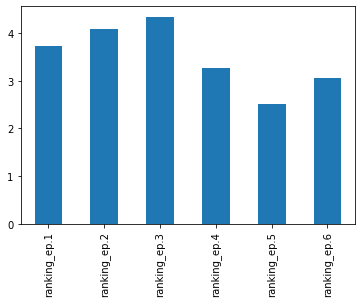

In [15]:
star_wars.iloc[:, 9:15].mean().plot.bar()

# Interpretation of the bar chart

* The rating scale is: lower numbers mean higher ratings

* This means that the original trilogy is more highly rated than the prequels
* ep. 5 is the highest rated movie.
* ep. 3 is the lowest.
* Of the original trilogy ep. 4 seems to be the least liked
* The prequels appear to be getting progressively more disliked

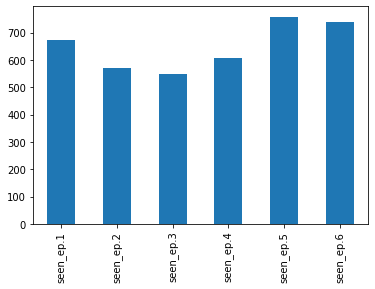

In [16]:
#find column names with 'seen' in the column title
col_nams_seen = star_wars.columns[star_wars.columns.str.contains('seen')].tolist()
star_wars[col_nams_seen[1:]].sum().plot.bar()

# Interpretation of bar chart

* The most commonly seen movies appear to be ep.5 and 6 
* These are followed by ep. 1. This implies, that a large part of the people taking this survey could be in their 30s and 40s.

## Differences in genders

In [18]:
print(star_wars['Gender'].value_counts(dropna = False))
gender_groups = star_wars.groupby('Gender')
males = gender_groups.get_group('Male')
females = gender_groups.get_group('Female')

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64


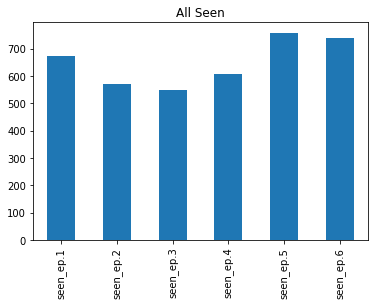

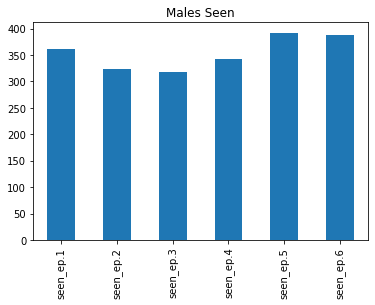

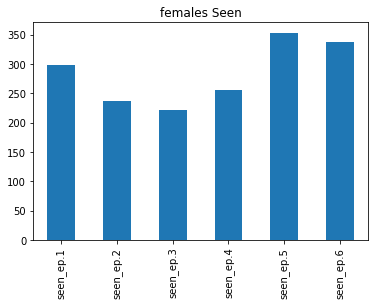

In [19]:
# Males seen
star_wars[col_nams_seen[1:]].sum().plot.bar(title = 'All Seen')
plt.show()

# Males seen
males[col_nams_seen[1:]].sum().plot.bar(title = 'Males Seen')
plt.show()


# Females Seen
females[col_nams_seen[1:]].sum().plot.bar(title = 'females Seen')
plt.show()


## Interpretation of the Gender Gap in the Movies Seen

* The Male population has a much smaller gap between movies seen. This implies that many of the male participants have seen all of the movies instead of a select few.

* The female population has a much higher gap in how much different movies have been watched. This could be due to the fact that the majority of die-hard Star Wars fans are male and females might only watch a select few. The amount of views in the individual movies is very similar with how highly they are rated. This might mean that a part of the female participants only watched the movies that were recommended to them by friends and skipped those that are generally regarded as not very good.

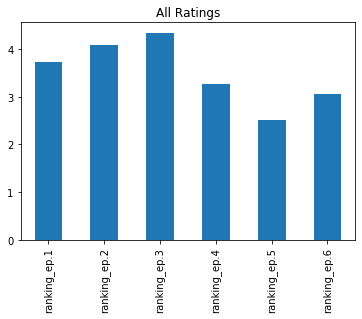

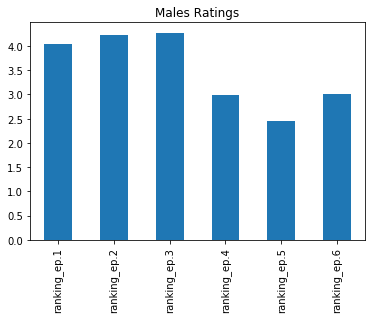

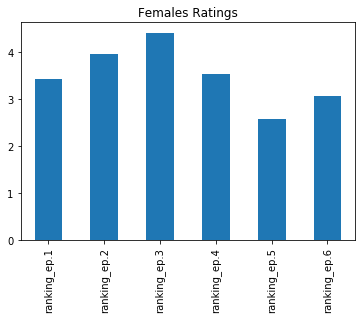

In [41]:
# All ratings
star_wars.iloc[:, 9:15].mean().plot.bar(title = 'All Ratings')
plt.show()


# Male Ratings
males.iloc[:, 9:15].mean().plot.bar(title = 'Males Ratings')
plt.show()

# Female Ratings
females.iloc[:, 9:15].mean().plot.bar(title = 'Females Ratings')
plt.show()

## Interpretation Gender Gap in Ratings

* The ratings are very similar between males and females.
* The female population seems to like ep. 4 more than the male population and think that the degradation in the quality of the prequels is stronger than the males.
* The male population appears to group all the prequels together, rating them very similarly.

* The difference in ratings might imply a difference in age demographic between the male and female population taking part in the survey, the females being older than the males

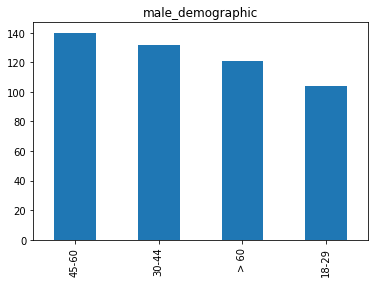

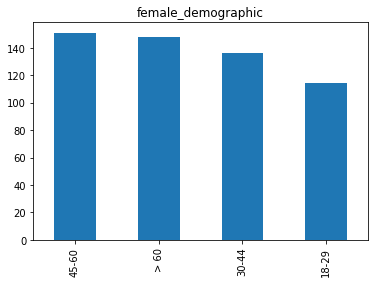

In [20]:
males['Age'].value_counts(dropna = False).plot.bar(title = 'male_demographic')
plt.show()
females['Age'].value_counts(dropna = False).plot.bar(title = 'female_demographic')
plt.show()


The hypothesis that female and male demographics are different is incorrect. The ages of the groups are very similar

# Summary

In this Project a survey on the Star Wars franchise was analyzed. Several results were discovered:

* The prequel movies are generally rates much lower than the original trilogy
* While male Star Wars fans are likely to have watched all of the movies, Women are more likely to watch the original trilogy.